# Breast Cancer

This dataset of breast cancer patients provides information on population based cancer statistics.
This project proposed a comparison of machine learning (ML) algorithms:Random Forest (RT), K Nearest Neighbour (KNN), Logistic Regression and Decision Tree (DT) on the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

From the given information of the breast cancer dataset , we need to classify whether it is a malignant cancer or benign cancer

# Attribute Information

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
data.tail() #returns last n rows

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
print(data.shape)

(569, 33)


In [8]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Data visualisation and pre-processing

In [10]:
data=data.drop(columns='id')
data=data.drop(columns='Unnamed: 32')

In [11]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
 print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [14]:
x = data.drop('diagnosis', axis=1)  # 'diagnosis' is the target variable
y = data['diagnosis']

Outlier detection

In [15]:
import plotly.graph_objects as go
names = data.columns[5:11]
# convert DataFrame to list
values=[] 
for column in data.iloc[:,5:11].columns:
    li = data[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']
        q
fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

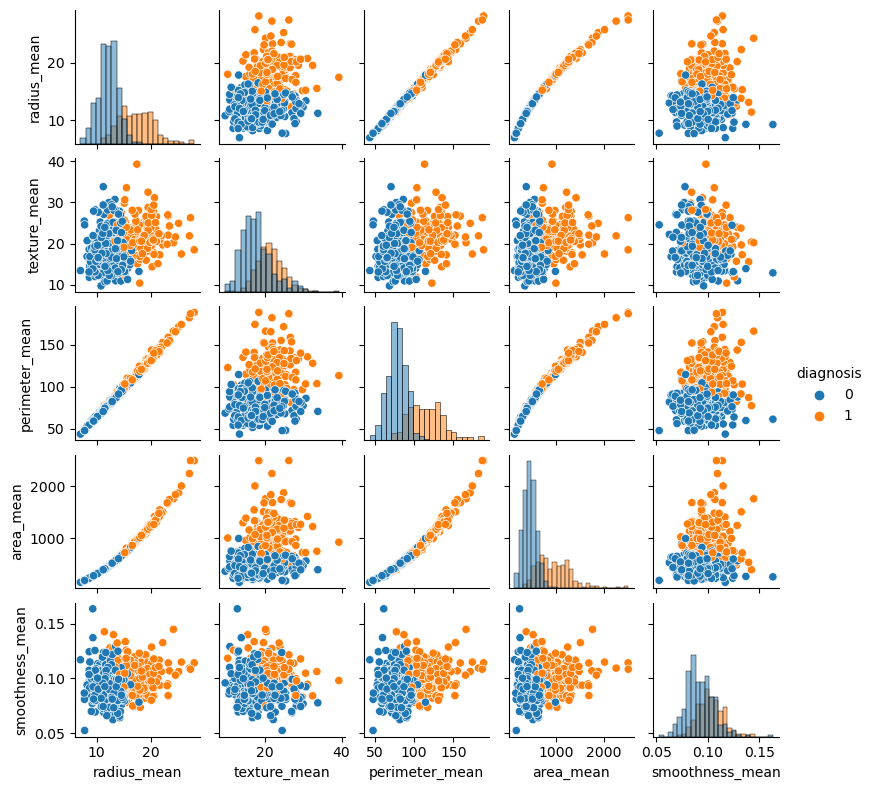

In [16]:
sns.pairplot(data.iloc[:,:6],hue='diagnosis', diag_kind='hist',height=1.6)

 Correlation matrix

In [17]:
corr = data.iloc[:,1:].corr()
fig = go.Figure(data=go.Heatmap(z=np.array(corr),x=corr.columns.tolist(),y=corr.columns.tolist(),xgap = 1,ygap = 1))
fig.update_layout(margin = dict(t=25,r=0,b=200,l=200),width = 1000, height = 700)
fig.show()

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <BarContainer object of 10 artists>)

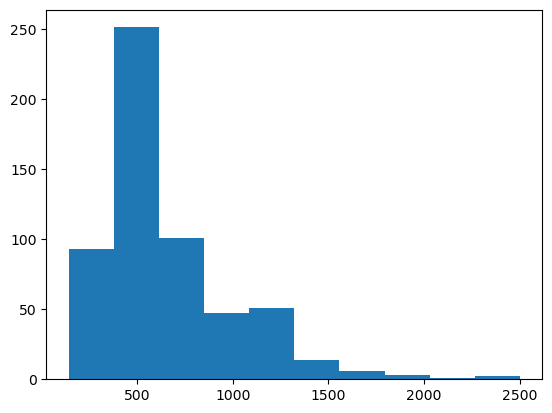

In [18]:
plt.hist(data['area_mean'])

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

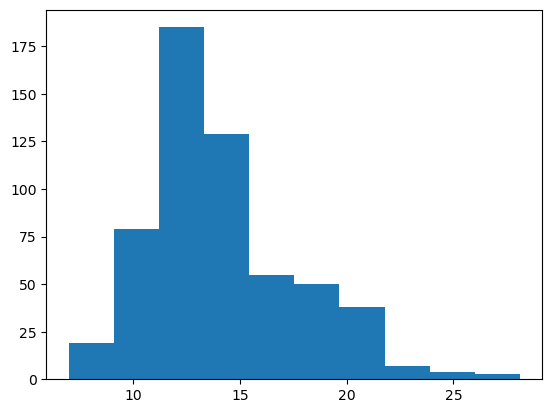

In [19]:
plt.hist(data['radius_mean'])

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <BarContainer object of 10 artists>)

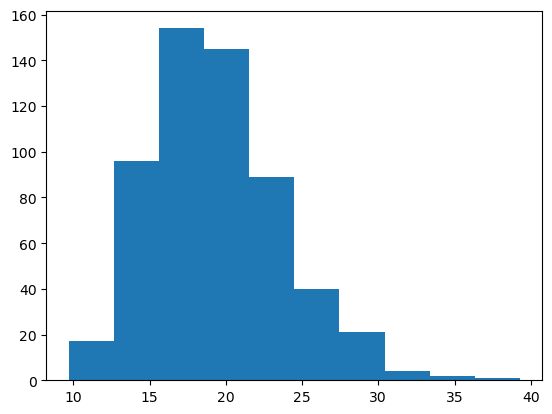

In [20]:
plt.hist(data['texture_mean'])

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <BarContainer object of 10 artists>)

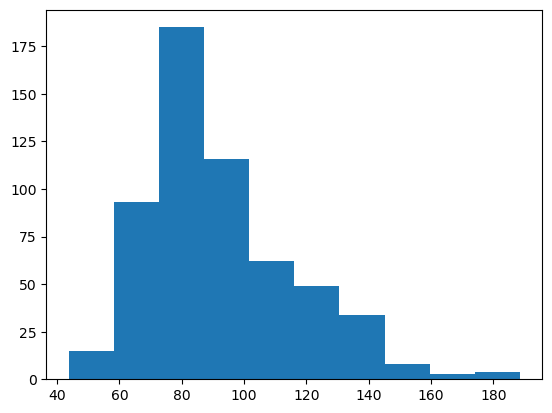

In [21]:
plt.hist(data['perimeter_mean'])

(array([  2.,  26., 110., 160., 164.,  79.,  20.,   5.,   2.,   1.]),
 array([0.05263 , 0.063707, 0.074784, 0.085861, 0.096938, 0.108015,
        0.119092, 0.130169, 0.141246, 0.152323, 0.1634  ]),
 <BarContainer object of 10 artists>)

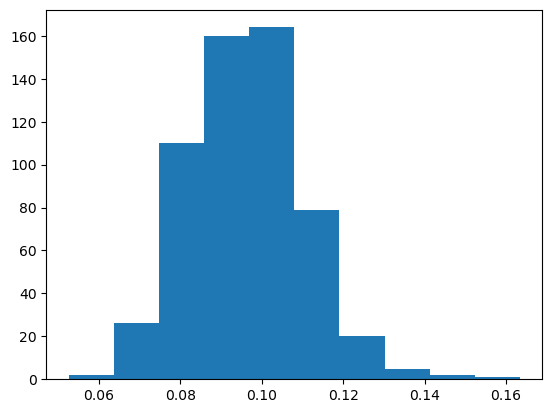

In [22]:
plt.hist(data['smoothness_mean'])

<Axes: xlabel='area_mean', ylabel='radius_mean'>

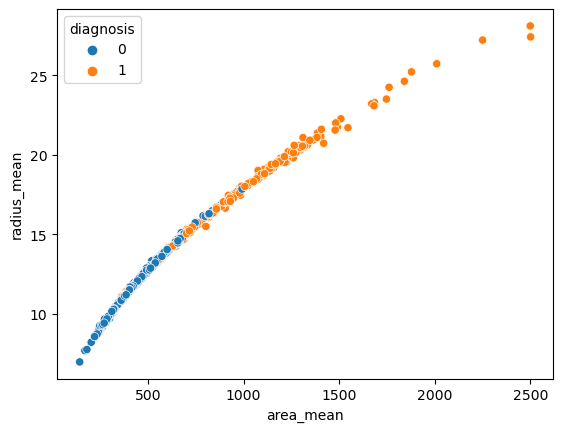

In [23]:
sns.scatterplot(x=data['area_mean'],y=data['radius_mean'],hue=data['diagnosis'])

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

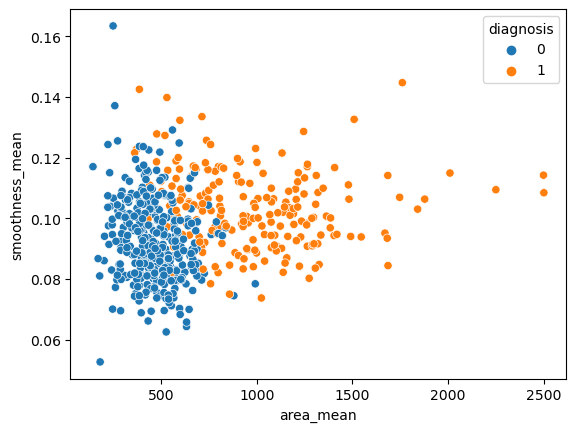

In [24]:
sns.scatterplot(x=data['area_mean'],y=data['smoothness_mean'],hue=data['diagnosis'])

<Axes: xlabel='area_mean', ylabel='perimeter_mean'>

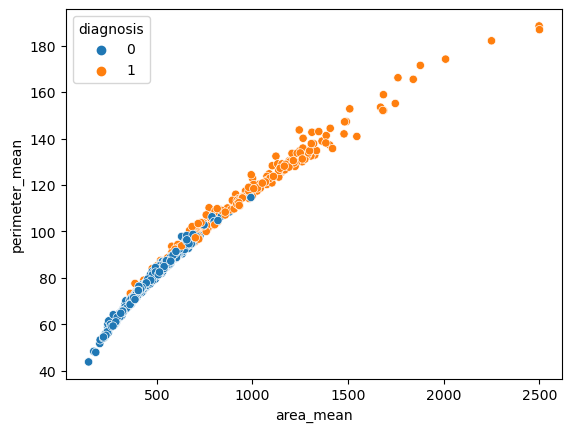

In [25]:
sns.scatterplot(x=data['area_mean'],y=data['perimeter_mean'],hue=data['diagnosis'])

<Axes: xlabel='area_mean', ylabel='texture_mean'>

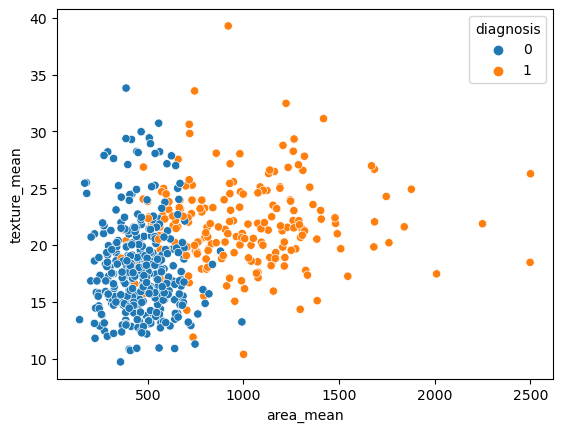

In [26]:
sns.scatterplot(x=data['area_mean'],y=data['texture_mean'],hue=data['diagnosis'])

<Axes: xlabel='smoothness_mean', ylabel='texture_mean'>

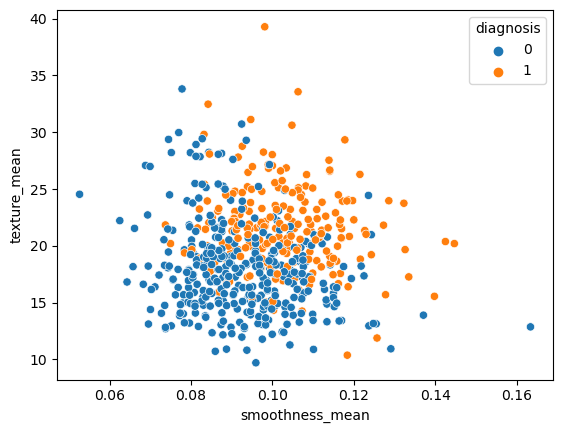

In [27]:
sns.scatterplot(x=data['smoothness_mean'],y=data['texture_mean'],hue=data['diagnosis'])

In [28]:
x=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y=data.diagnosis.values

In [29]:
x

texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0           10.38          122.80     1001.0          0.11840   
1           17.77          132.90     1326.0          0.08474   
2           21.25          130.00     1203.0          0.10960   
3           20.38           77.58      386.1          0.14250   
4           14.34          135.10     1297.0          0.10030   
..            ...             ...        ...              ...   
564         22.39          142.00     1479.0          0.11100   
565         28.25          131.20     1261.0          0.09780   
566         28.08          108.30      858.1          0.08455   
567         29.33          140.10     1265.0          0.11780   
568         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                   0.07871     1.0950      0.9053         8.589   153.40   
1                   0.05667     0.5435      0.7339         3.398    74.08   
2                   0.05999     0.7456      0.7869         4.585    94.03   
3                   0.09744     0.4956      1.1560         3.445    27.23   
4                   0.05883     0.7572      0.7813         5.438    94.44   
..                      ...        ...         ...           ...      ...   
564                 0.05623     1.1760      1.2560         7.673   158.70   
565                 0.05533     0.7655      2.4630         5.203    99.04   
566                 0.05648     0.4564      1.0750         3.425    48.55   
567                 0.07016     0.7260      1.5950         5.772    86.22   
568                 0.05884     0.3857      1.4280         2.548    19.15   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.006399         0.04904       0.05373            0.01587   
1         0.005225         0.01308       0.01860            0.01340   
2         0.006150         0.04006       0.03832            0.02058   
3         0.009110         0.07458       0.05661            0.01867   
4         0.011490         0.02461       0.05688            0.01885   
..             ...             ...           ...                ...   
564       0.010300         0.02891       0.05198            0.02454   
565       0.005769         0.02423       0.03950            0.01678   
566       0.005903         0.03731       0.04730            0.01557   
567       0.006522         0.06158       0.07117            0.01664   
568       0.007189         0.00466       0.00000            0.00000   

     symmetry_se  fractal_dimension_se  
0        0.03003              0.006193  
1        0.01389              0.003532  
2        0.02250              0.004571  
3        0.05963              0.009208  
4        0.01756              0.005115  
..           ...                   ...  
564      0.01114              0.004239  
565      0.01898              0.002498  
566      0.01318              0.003892  
567      0.02324              0.006185  
568      0.02676              0.002783  

[569 rows x 19 columns]

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [31]:
#Feature scaling:Standardize features by removing the mean and scaling to unit variance.

from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [32]:
x

array([[-2.07333501,  1.26993369,  0.9843749 , ...,  0.66081994,
         1.14875667,  0.90708308],
       [-0.35363241,  1.68595471,  1.90870825, ...,  0.26016207,
        -0.80545038, -0.09944374],
       [ 0.45618695,  1.56650313,  1.55888363, ...,  1.42482747,
         0.23703554,  0.2935594 ],
       ...,
       [ 2.0455738 ,  0.67267578,  0.57795264, ...,  0.61215704,
        -0.89141612,  0.03672674],
       [ 2.33645719,  1.98252415,  1.73521799, ...,  0.78572138,
         0.32663363,  0.90405707],
       [ 1.22179204, -1.81438851, -1.34778924, ..., -1.91344745,
         0.75282996, -0.382754  ]])

In [33]:
#Train Test Split
from  sklearn.model_selection import train_test_split #evaluate the performance.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=0)

In [34]:
xtrain

array([[ 2.48538949, -0.5992776 , -0.53892646, ..., -1.91344745,
         1.315845  , -0.24923127],
       [ 0.28631105, -0.60751564, -0.55798194, ..., -0.81090835,
        -0.73522485, -0.85594642],
       [ 0.39568321,  2.27909359,  2.37798519, ...,  0.61864543,
        -0.15768039,  0.30982421],
       ...,
       [-0.22564372, -1.32422512, -1.07020482, ..., -0.848541  ,
        -0.13588626, -0.40923159],
       [-0.24891439, -1.28674204, -1.04318585, ..., -1.91344745,
         2.11254156, -0.79693922],
       [ 1.07984094, -0.71872918, -0.71497641, ...,  0.14174901,
        -0.68558266,  0.35672738]])

In [35]:
ytrain

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

# Logistic Regression

Logistic regression is a statistical model that estimates the probability of an event occurring based on a given dataset of independent variables.

In [36]:
model=LogisticRegression()

In [37]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
#testing data used for prediction
predicted_test=model.predict(xtest)

In [39]:
# predict 
xtrain_prediction=model.predict(xtrain)
xtest_prediction=model.predict(xtest)
accuracy_score(xtrain_prediction,ytrain)

0.96875

In [40]:
accuracy_score(xtest_prediction,ytest)

0.9473684210526315

In [41]:
predicted_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

# Accuracy

In [42]:
#importing library for calculating accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
accuracy=r2_score(ytest,predicted_test)

In [44]:
accuracy

0.7779220779220779

In [45]:
mean=mean_squared_error(ytest,predicted_test)

In [46]:
mean

0.05263157894736842

# Decision tree

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models

In [47]:
x

array([[-2.07333501,  1.26993369,  0.9843749 , ...,  0.66081994,
         1.14875667,  0.90708308],
       [-0.35363241,  1.68595471,  1.90870825, ...,  0.26016207,
        -0.80545038, -0.09944374],
       [ 0.45618695,  1.56650313,  1.55888363, ...,  1.42482747,
         0.23703554,  0.2935594 ],
       ...,
       [ 2.0455738 ,  0.67267578,  0.57795264, ...,  0.61215704,
        -0.89141612,  0.03672674],
       [ 2.33645719,  1.98252415,  1.73521799, ...,  0.78572138,
         0.32663363,  0.90405707],
       [ 1.22179204, -1.81438851, -1.34778924, ..., -1.91344745,
         0.75282996, -0.382754  ]])

In [48]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [49]:
#spliting the data
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.3,random_state=40)

In [50]:
#importing the library  decisiontreeregressor
from sklearn.tree  import DecisionTreeRegressor

In [51]:
dc=DecisionTreeRegressor()

In [52]:
dc.fit(x1train,y1train)

DecisionTreeRegressor()

In [53]:
prd1=dc.predict(x1test)

In [54]:
prd1

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1.])

In [55]:
y1test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [56]:
accuracy1=r2_score(y1test,prd1)

In [57]:
accuracy1

0.707919254658385

# Decision Tree Classifier with gini index criterion 

In [58]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
cls_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [60]:
# fit the model
cls_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Model Evaluation

In [61]:
print('Train Accuracy', cls_gini.score(xtrain, ytrain))
print('Test Accuracy', cls_gini.score(xtest, ytest))

Train Accuracy 0.951171875
Test Accuracy 0.9122807017543859


# Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [62]:
#importing the library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [64]:
prediction = rf_model.predict(xtest)

In [65]:
prediction = rf_model.predict(xtest)

In [66]:
#spliting the data
x2train,x2test,y2train,y2test=train_test_split(x,y,test_size=0.3,random_state=45)

In [67]:
rd=RandomForestRegressor(n_estimators=40)

In [68]:
rd.fit(x2train,y2train)

RandomForestRegressor(n_estimators=40)

In [69]:
prd2=rd.predict(x2test)

In [70]:
prd2

array([0.   , 1.   , 1.   , 0.025, 0.225, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.05 , 1.   , 0.   , 0.   , 0.   , 1.   , 0.45 , 0.   ,
       0.05 , 0.   , 0.   , 0.025, 0.   , 0.   , 1.   , 0.   , 0.   ,
       0.175, 0.1  , 0.025, 0.025, 0.   , 0.025, 1.   , 0.   , 0.   ,
       0.   , 0.075, 0.825, 0.975, 0.925, 0.   , 0.05 , 1.   , 0.75 ,
       0.   , 0.   , 1.   , 0.05 , 0.   , 0.7  , 0.   , 1.   , 0.   ,
       0.   , 1.   , 0.075, 0.   , 0.675, 0.   , 0.175, 1.   , 0.   ,
       0.   , 0.95 , 0.025, 1.   , 0.975, 0.125, 0.975, 0.675, 1.   ,
       1.   , 0.   , 0.   , 1.   , 0.   , 1.   , 0.025, 0.   , 1.   ,
       0.025, 1.   , 0.   , 0.975, 0.425, 0.825, 0.   , 0.975, 0.775,
       1.   , 0.175, 0.   , 0.525, 1.   , 1.   , 0.95 , 0.   , 0.025,
       0.   , 0.025, 0.   , 1.   , 1.   , 0.1  , 1.   , 0.85 , 0.   ,
       0.   , 0.   , 0.   , 0.   , 1.   , 0.85 , 0.   , 0.1  , 0.   ,
       1.   , 0.975, 0.9  , 0.   , 1.   , 1.   , 0.025, 0.5  , 0.   ,
       0.   , 0.   ,

In [71]:
#finding the accuracy
accuracy2=r2_score(y2test,prd2)

In [72]:
accuracy2

0.7701789307004471

In [73]:
mean2=mean_squared_error(y2test,prd2)

In [74]:
mean2

0.0527375730994152

# KNN(k-nearest neighbors algorithm)

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
x3train,x3test,y3train,y3test=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=10)

In [78]:
knn.fit(x3train,y3train)

KNeighborsClassifier(n_neighbors=10)

In [79]:
prd3 = knn.predict(x3test)

In [80]:
prd3

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [81]:
accuracy4=r2_score(y3test,prd3)

In [82]:
accuracy4

0.6984126984126984

In [83]:
cost_results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest Regressor', 
              'Decision Tree Regressor' ,
              'knn'
              ],
    'Score': [ accuracy,
              accuracy1, 
              accuracy2,
             accuracy4]
           })

In [84]:
cost_results

Model     Score
0      Logistic Regression  0.777922
1  Random Forest Regressor  0.707919
2  Decision Tree Regressor  0.770179
3                      knn  0.698413

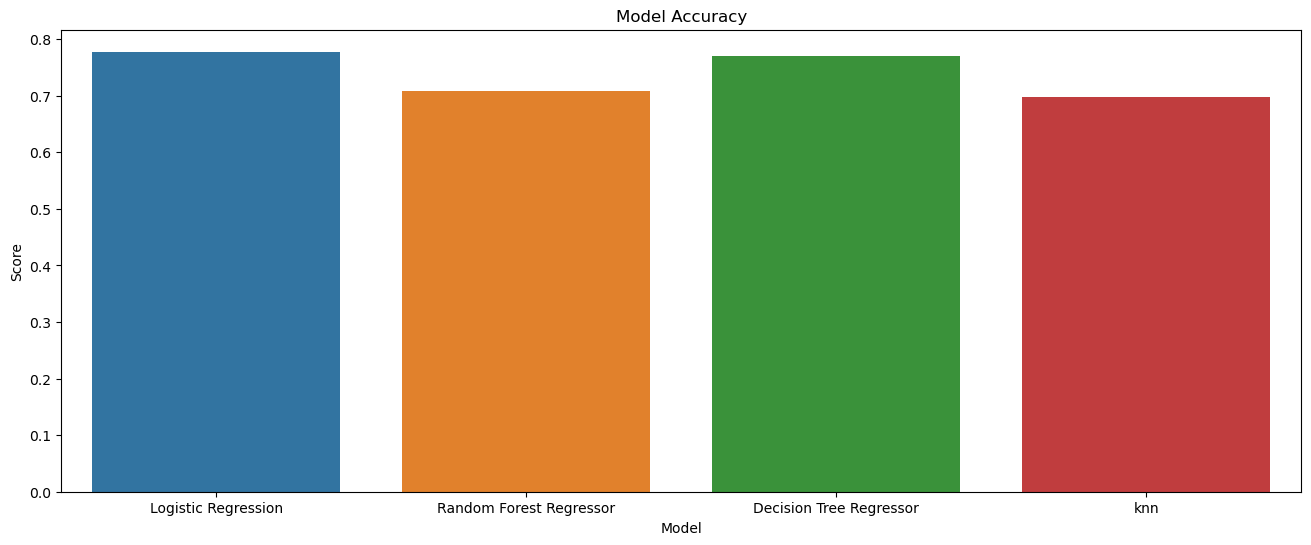

In [85]:
plt.figure(figsize=(16,6))
sns.barplot(x='Model' ,y='Score',data=cost_results)
plt.title('Model Accuracy')
plt.show()

# Summary

Breast cancer diagnosis can be predicted with roughly 77% accuracy using these tumor characteristics.

Machine learning algorithms that performed the best include linear models i.e logistic regression and ensemble algorithm: random forest regressor and an Decicion Tree Regressor and k-nearest neighbors algorithm.

Here we can conclude our Logistic Regression model have High Accuracy score compare to other models.

# Saved the trained model

In [86]:
import pickle

In [87]:
filename = 'trained_model.sav'

In [88]:
pickle.dump(model,open(filename,'wb'))

In [89]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

# Making a predictive system

In [90]:
input_data = (5,166,72,19,175,25.8,0.587,51,22.3,89,54,23.1,15,18.56,45.86,25.32,86,84,77)

In [91]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [92]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [93]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


In [94]:
if (prediction[0] == 0):
    print('the person is benign')
else:
      print('the person is malignant')

the person is malignant
